# 1.

In [1]:
from keras.src.utils import to_categorical
from keras import Input
from keras import models
from keras import layers
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.layers import InputLayer
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image
import tensorflow as tf


In [2]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

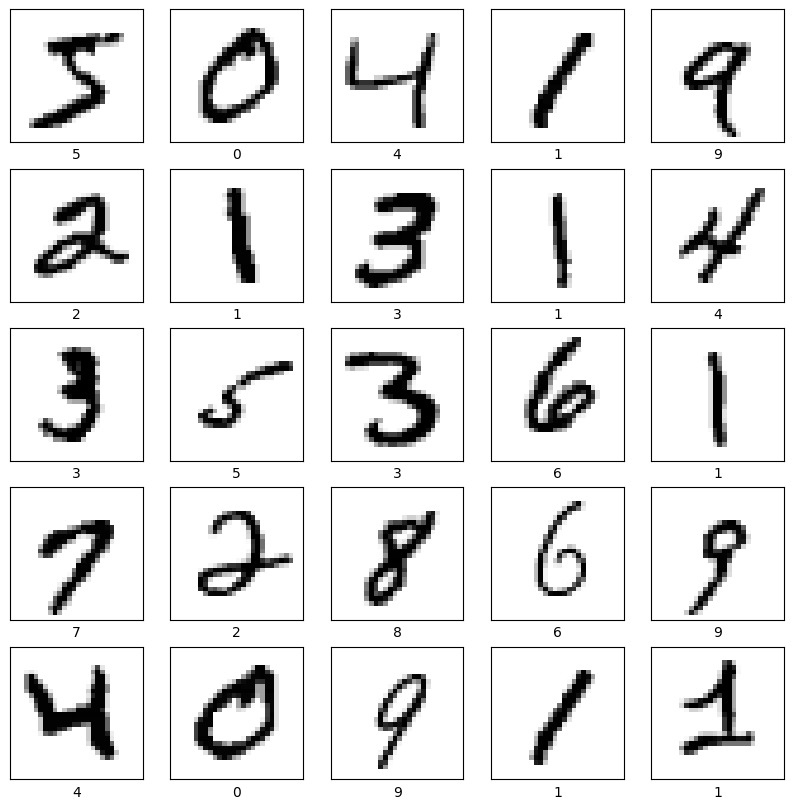

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show( )

In [4]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [5]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
network = models.Sequential()
network.add(layers.Input(shape=(28*28,))) 
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

In [7]:
network.compile(optimizer = 'rmsprop',
                    loss = 'categorical_crossentropy',
                    metrics = ['accuracy'])

In [8]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8679 - loss: 0.4530
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9664 - loss: 0.1157
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9793 - loss: 0.0682
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9849 - loss: 0.0523
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9893 - loss: 0.0374


In [9]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9755 - loss: 0.0822


In [10]:
network.save('my_model.keras')

In [11]:
json_string = network.to_json()

In [12]:
network.save_weights('my_model_weights.weights.h5')

In [13]:
model = load_model('my_model.keras')

In [14]:
filenames = ['one.png','seven.png','four.png','nine.png']

for fname in filenames:
    img = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
    img = 255 - img
    img = cv2.resize(img, (28, 28))

    tst = img.reshape((1, 28 * 28)).astype('float32') / 255

    pred = list(model.predict(tst)[0])
    predicted_label = pred.index(max(pred))
    
    print(f"{fname} -> Модель розпізнала як: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
one.png -> Модель розпізнала як: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
seven.png -> Модель розпізнала як: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
four.png -> Модель розпізнала як: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
nine.png -> Модель розпізнала як: 9


# 2.

## CIFAR-10

In [15]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

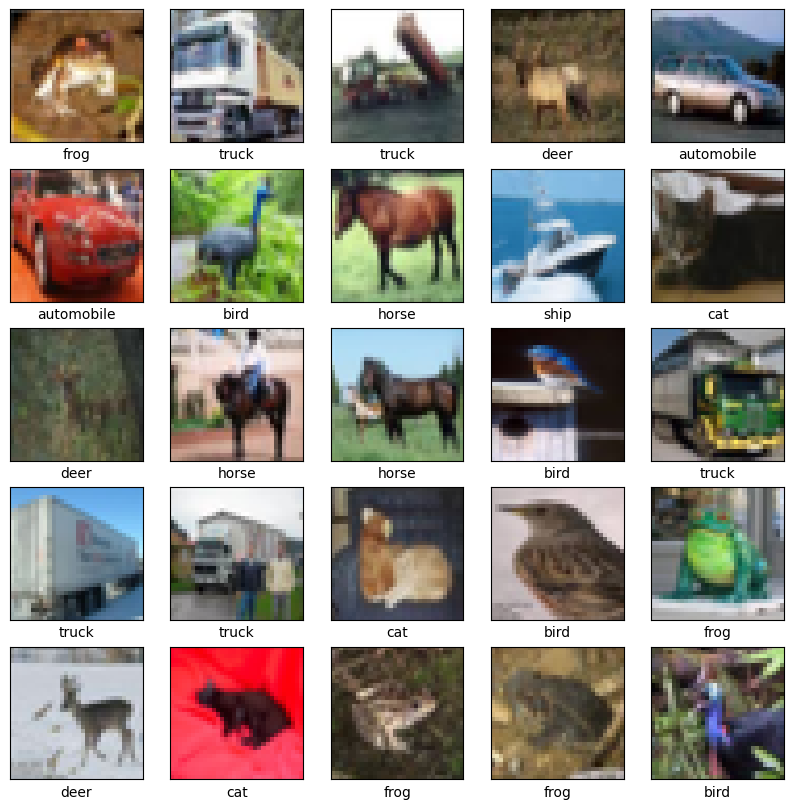

In [16]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(labels[y_train[i][0]])
plt.show()

In [17]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [18]:
model2 = Sequential()
model2.add(Conv2D(filters=32, activation='relu', kernel_size=3, input_shape=(32, 32, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=64, activation='relu', kernel_size=3))
model2.add(Conv2D(filters=64, activation='relu', kernel_size=3))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(10))

C:\Users\Stanislav\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model2.compile(optimizer='adam', metrics=['accuracy'], loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [20]:
model2.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.3234 - loss: 1.8216 - val_accuracy: 0.5163 - val_loss: 1.3218
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5079 - loss: 1.3683 - val_accuracy: 0.6030 - val_loss: 1.1269
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5740 - loss: 1.1956 - val_accuracy: 0.6287 - val_loss: 1.0261
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6145 - loss: 1.0865 - val_accuracy: 0.6547 - val_loss: 0.9754
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6419 - loss: 1.0021 - val_accuracy: 0.6802 - val_loss: 0.9180
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6694 - loss: 0.9387 - val_accuracy: 0.6929 - val_loss: 0.8759
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6910 - loss: 0.8753 - val_accuracy: 0.6848 - val_loss: 0.9100
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7036 - loss: 0.8350 - val_acc

In [21]:
test_loss, test_accuracy = model2.evaluate(x_test, y_test)
print(f"Точність на тестових даних: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7145 - loss: 0.8245
Точність на тестових даних: 0.7152


In [22]:
filenames = ['cat.jpeg','bird.jpg','frog.jpg']

for fname in filenames:

    img = cv2.imread(fname)
    img = cv2.resize(img, (32, 32))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)

    predictions = model2.predict(img)
    predicted_label = np.argmax(predictions)

    print(f"{fname} -> Модель розпізнала як: {labels[predicted_label]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
cat.jpeg -> Модель розпізнала як: truck
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
bird.jpg -> Модель розпізнала як: bird
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
frog.jpg -> Модель розпізнала як: frog


## FMNIST

In [23]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [24]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

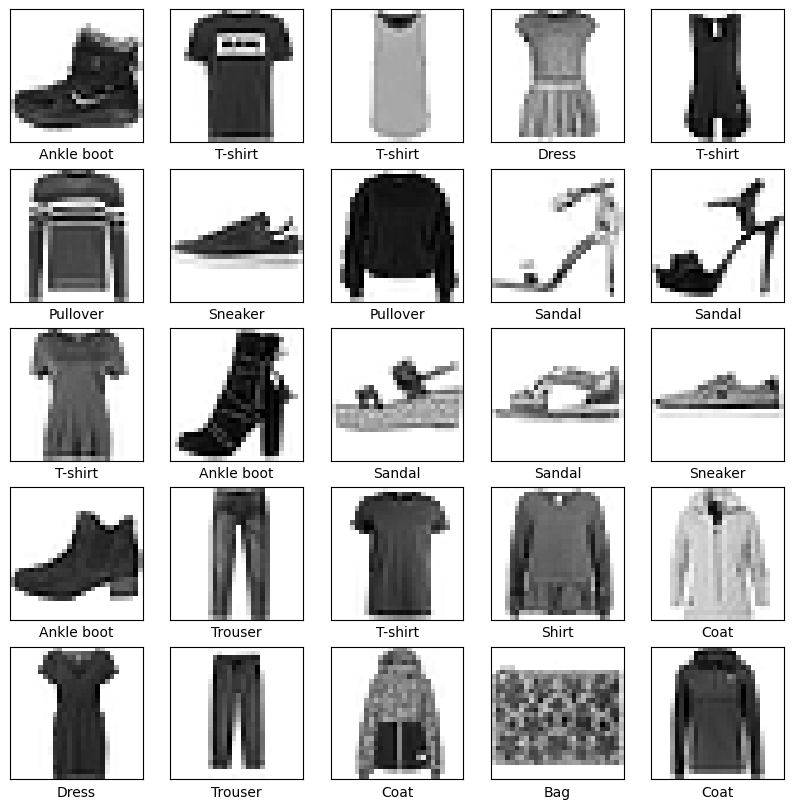

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]); 
    plt.yticks([]); 
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [26]:
x_train = x_train.reshape((-1, 28, 28, 1)).astype("float32") / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)).astype("float32") / 255.0

In [27]:
model3 = Sequential()

model3.add(InputLayer(input_shape=(28, 28, 1)))
model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(10, activation='softmax'))

C:\Users\Stanislav\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [28]:
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model3.fit(x_train, y_train, epochs=10, batch_size=64,validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.7604 - loss: 0.7084 - val_accuracy: 0.8817 - val_loss: 0.3295
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8729 - loss: 0.3584 - val_accuracy: 0.8978 - val_loss: 0.2753
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8898 - loss: 0.3130 - val_accuracy: 0.8990 - val_loss: 0.2753
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8988 - loss: 0.2810 - val_accuracy: 0.8947 - val_loss: 0.3015
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8981 - loss: 0.2725 - val_accuracy: 0.9194 - val_loss: 0.2276
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9061 - loss: 0.2574 - val_accuracy: 0.9129 - val_loss: 0.2477
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9124 - loss: 0.2433 - val_accuracy: 0.9007 - val_loss: 0.2807
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9159 - loss: 0.2347 - 

In [29]:
test_loss, test_acc = model3.evaluate(x_test, y_test)
print(f"Точність на тестових даних: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8889 - loss: 0.3131
Точність на тестових даних: 0.8905


In [30]:
filenames = [ 't-shirt.png', 'bag.jpg', 'dress.png']

for fname in filenames:
    img = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = cv2.bitwise_not(img)
    img = img.astype("float32") / 255.0
    img_input = np.expand_dims(img, axis=(0, -1))

    preds = model3.predict(img_input)
    predicted_idx = np.argmax(preds)
    confidence = preds[0][predicted_idx]

    print(f"{fname} -> {class_names[predicted_idx]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
t-shirt.png -> T-shirt
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
bag.jpg -> Bag
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
dress.png -> Dress
